In [1]:
#Importing Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('dataset.csv')           #reading dataset and checking for head
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
symptoms = []            #making array of all the elements of columns and storing it in symptoms                  

for col in data.columns[1:]:
    symptoms.append(data[col].unique())

symptoms

[array(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
        ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
        ' muscle_wasting', ' patches_in_throat', ' fatigue',
        ' weight_loss', ' sunken_eyes', ' cough', ' headache',
        ' chest_pain', ' back_pain', ' weakness_in_limbs', ' chills',
        ' joint_pain', ' yellowish_skin', ' constipation',
        ' pain_during_bowel_movements', ' breathlessness', ' cramps',
        ' weight_gain', ' mood_swings', ' neck_pain', ' muscle_weakness',
        ' stiff_neck', ' pus_filled_pimples', ' burning_micturition',
        ' bladder_discomfort', ' high_fever'], dtype=object),
 array([' skin_rash', ' nodal_skin_eruptions', ' shivering', ' chills',
        ' acidity', ' ulcers_on_tongue', ' vomiting', ' yellowish_skin',
        ' stomach_pain', ' loss_of_appetite', ' indigestion',
        ' patches_in_throat', ' high_fever', ' weight_loss',
        ' restlessness', ' sunken_eyes', ' dehydration', ' cough',

In [4]:
unique_symp = []      #creating a list with unique symptoms without null values and storing it in unique_symp

for row in symptoms:
    for symp in row:
        if (symp not in unique_symp) and (symp is not np.nan):
            unique_symp.append(symp.strip())

In [5]:
lst=unique_symp                #removing duplicate values from unique_symp
x = np.array(lst)
arr=np.unique(x)
symp_new= arr.tolist()
len(symp_new)

131

In [6]:
arr=data.Disease.unique()        #sorting all the disease in alphabetic order
dis= arr.tolist()
disease=sorted(dis)
disease

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

In [7]:
unique_symp            #printing elements of unique symptoms

['itching',
 'skin_rash',
 'continuous_sneezing',
 'shivering',
 'stomach_pain',
 'acidity',
 'vomiting',
 'indigestion',
 'muscle_wasting',
 'patches_in_throat',
 'fatigue',
 'weight_loss',
 'sunken_eyes',
 'cough',
 'headache',
 'chest_pain',
 'back_pain',
 'weakness_in_limbs',
 'chills',
 'joint_pain',
 'yellowish_skin',
 'constipation',
 'pain_during_bowel_movements',
 'breathlessness',
 'cramps',
 'weight_gain',
 'mood_swings',
 'neck_pain',
 'muscle_weakness',
 'stiff_neck',
 'pus_filled_pimples',
 'burning_micturition',
 'bladder_discomfort',
 'high_fever',
 'skin_rash',
 'nodal_skin_eruptions',
 'shivering',
 'chills',
 'acidity',
 'ulcers_on_tongue',
 'vomiting',
 'yellowish_skin',
 'stomach_pain',
 'loss_of_appetite',
 'indigestion',
 'patches_in_throat',
 'high_fever',
 'weight_loss',
 'restlessness',
 'sunken_eyes',
 'dehydration',
 'cough',
 'chest_pain',
 'dizziness',
 'headache',
 'weakness_in_limbs',
 'neck_pain',
 'weakness_of_one_body_side',
 'fatigue',
 'joint_pain',

In [8]:
print(symp_new)               #printing the final list without any duplicate items in it

['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability', 'irritation_in_anus', 'it

In [9]:
len(symp_new)                #checking the no. of elements in list symp_new just for final confirmation

131

In [10]:
values = [0.0] * 131         #storing symp_new as a zipped dict named symp_dict
symp_dict = dict(zip(symp_new, values))
symp_dict

{'abdominal_pain': 0.0,
 'abnormal_menstruation': 0.0,
 'acidity': 0.0,
 'acute_liver_failure': 0.0,
 'altered_sensorium': 0.0,
 'anxiety': 0.0,
 'back_pain': 0.0,
 'belly_pain': 0.0,
 'blackheads': 0.0,
 'bladder_discomfort': 0.0,
 'blister': 0.0,
 'blood_in_sputum': 0.0,
 'bloody_stool': 0.0,
 'blurred_and_distorted_vision': 0.0,
 'breathlessness': 0.0,
 'brittle_nails': 0.0,
 'bruising': 0.0,
 'burning_micturition': 0.0,
 'chest_pain': 0.0,
 'chills': 0.0,
 'cold_hands_and_feets': 0.0,
 'coma': 0.0,
 'congestion': 0.0,
 'constipation': 0.0,
 'continuous_feel_of_urine': 0.0,
 'continuous_sneezing': 0.0,
 'cough': 0.0,
 'cramps': 0.0,
 'dark_urine': 0.0,
 'dehydration': 0.0,
 'depression': 0.0,
 'diarrhoea': 0.0,
 'dischromic _patches': 0.0,
 'distention_of_abdomen': 0.0,
 'dizziness': 0.0,
 'drying_and_tingling_lips': 0.0,
 'enlarged_thyroid': 0.0,
 'excessive_hunger': 0.0,
 'extra_marital_contacts': 0.0,
 'family_history': 0.0,
 'fast_heart_rate': 0.0,
 'fatigue': 0.0,
 'fluid_overl

In [11]:
l2=[]                    #appemding 0 same as the lenght of symp_new in l2
for i in range(0,len(symp_new)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
len(l2)

131

In [13]:
encoded = []

for i in range(len(data)):
    row = data.iloc[i].values
    temp = dict(zip(symp_new, values))

    for i in row:
        if i is not np.nan:
            temp[i.strip()] = 1.0

    encoded.append(temp)

In [14]:
pre_process = pd.DataFrame(data=encoded)     #creating dataframe without null values
pre_process['disease'] = data['Disease']
pre_process.fillna(value=0,inplace=True)
pre_process

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,(vertigo) Paroymsal Positional Vertigo
4916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Acne
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Urinary tract infection
4918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psoriasis


In [15]:
pre_process.to_csv('pre_processed1.csv')  #making csv of the above dataframe for further operations

In [16]:
df=pd.read_csv('pre_processed1.csv')      #reading new csv
df.head()

,Unnamed: 0,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection


In [17]:
df.drop('Unnamed: 0',axis=1, inplace=True)    #dropping Unnamed: 0 as it is not useful

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['disease']= le.fit_transform(df['disease'])

In [19]:
df.head()            #final data which is being used

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15


In [20]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [21]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Rajeev\AppData\Local\Temp/ipykernel_22720/3685093358.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


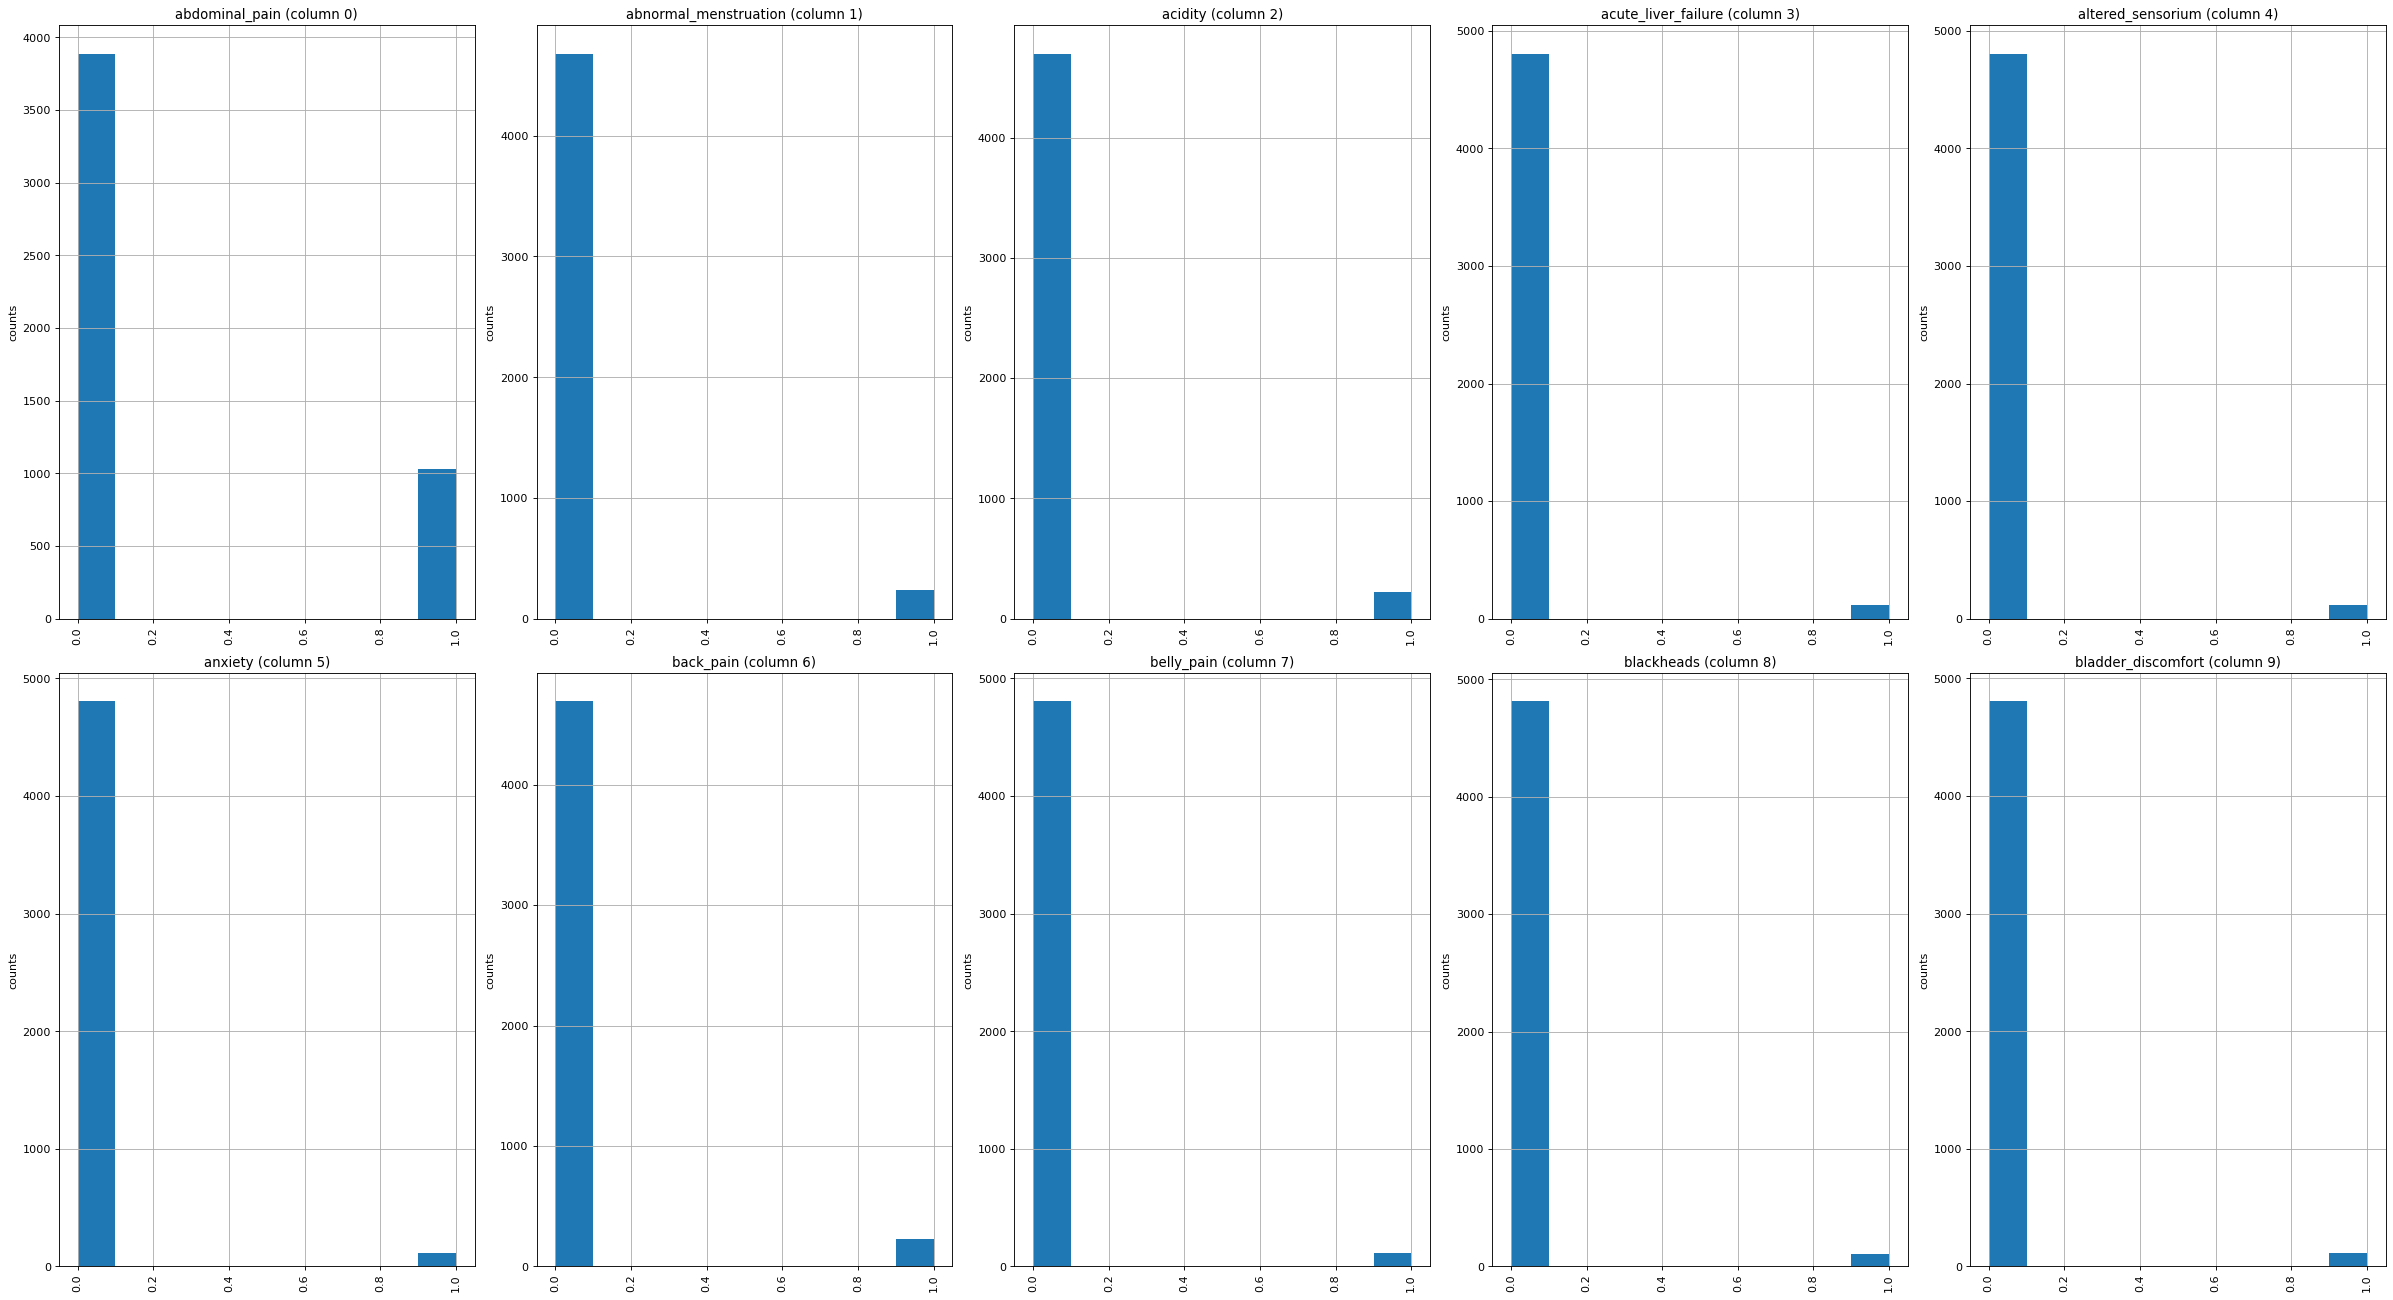

In [22]:
plotPerColumnDistribution(df, 10, 5)

C:\Users\Rajeev\AppData\Local\Temp/ipykernel_22720/1304029198.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df1 = df1.dropna('columns')


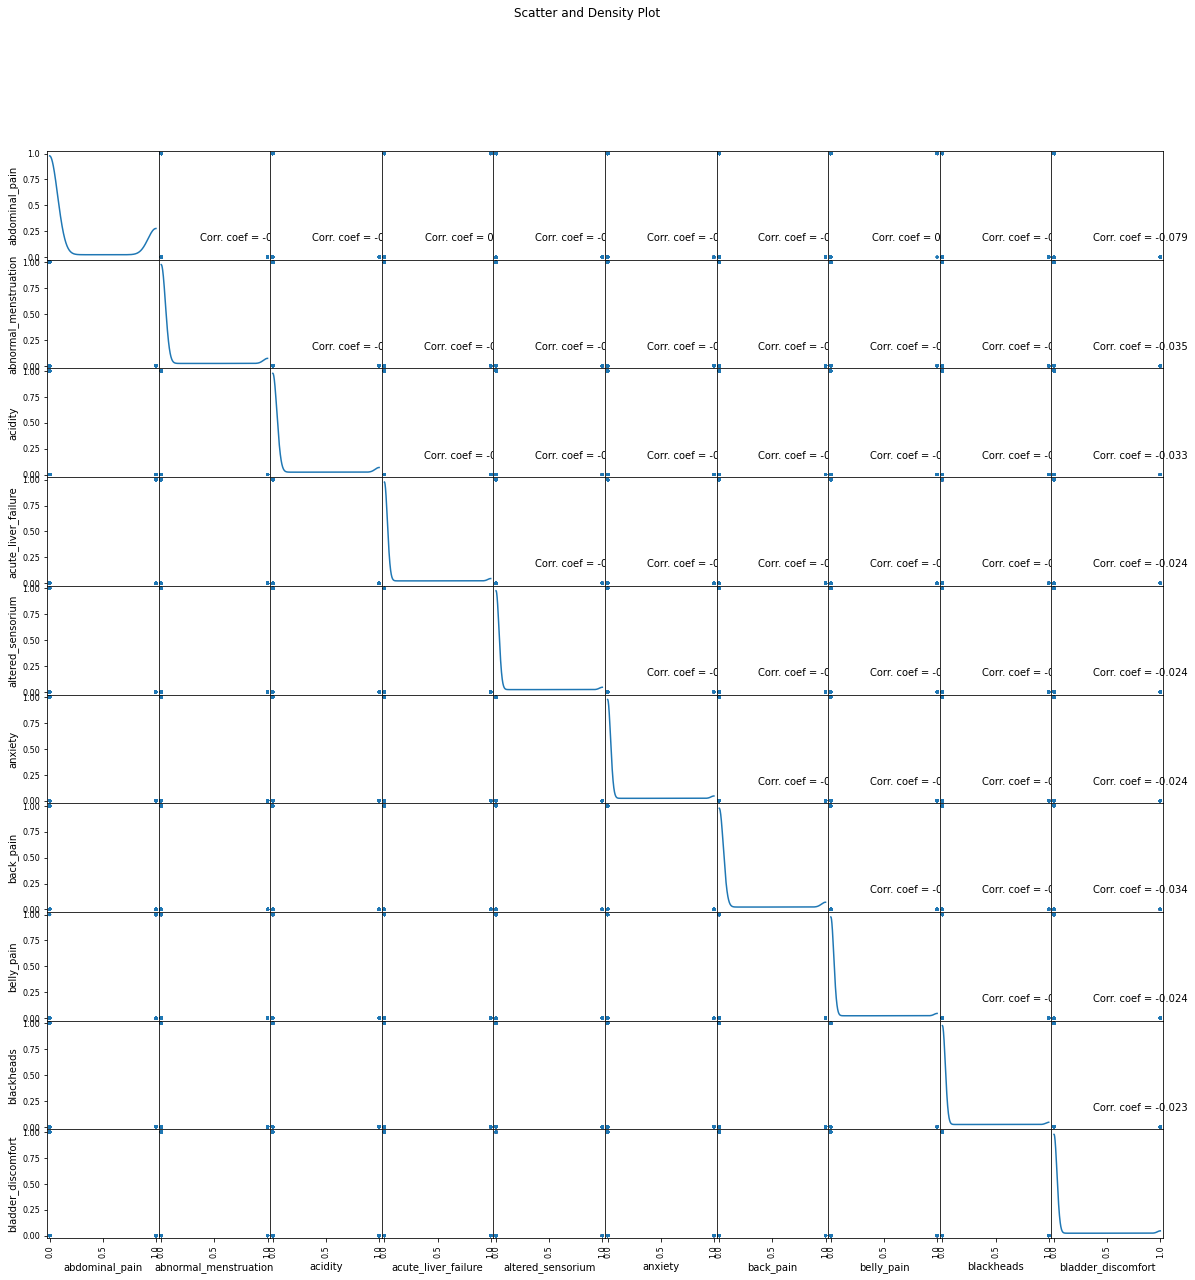

In [23]:
plotScatterMatrix(df, 20, 10)    #visualilizing the correlation between various symptoms

In [24]:
X= df[symp_new]                #defining X and y
y = df[["disease"]]            #X is containing all the symptoms
#np.ravel(y)                   #y is containig all disease
print(X)

      abdominal_pain  abnormal_menstruation  acidity  acute_liver_failure  \
0                0.0                    0.0      0.0                  0.0   
1                0.0                    0.0      0.0                  0.0   
2                0.0                    0.0      0.0                  0.0   
3                0.0                    0.0      0.0                  0.0   
4                0.0                    0.0      0.0                  0.0   
...              ...                    ...      ...                  ...   
4915             0.0                    0.0      0.0                  0.0   
4916             0.0                    0.0      0.0                  0.0   
4917             0.0                    0.0      0.0                  0.0   
4918             0.0                    0.0      0.0                  0.0   
4919             0.0                    0.0      0.0                  0.0   

      altered_sensorium  anxiety  back_pain  belly_pain  blackheads  \
0   

In [25]:
y

,disease
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [27]:
X_train

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
1331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4071,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train

,disease
1331,23
4071,7
1585,5
1147,24
4295,26
...,...
2028,38
2135,17
2467,12
264,10


In [29]:
X_test

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
2590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2483,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y_test

,disease
2590,12
679,10
4669,0
4826,18
4362,8
...,...
4131,26
2483,22
2992,27
1949,39


# Using Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
estimator = []
estimator.append(('DTC', DecisionTreeClassifier(max_depth=14,criterion="entropy")))
estimator.append(('RFC', RandomForestClassifier(n_estimators=47, max_depth=12)))
estimator.append(('GBC', GradientBoostingClassifier(n_estimators=25,learning_rate=0.01,max_depth=5)))
estimator.append(('GNB', GaussianNB(var_smoothing=1.0)))
estimator.append(('KNC', KNeighborsClassifier(n_neighbors=1)))
estimator.append(('SVC', SVC(C=0.1,gamma=1,kernel="rbf")))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(vot_hard.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(vot_hard.score(X_test, y_test)))

C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [32]:
root = Tk()
pred1=StringVar()
def VotingEnsemble():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import VotingClassifier
        vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
        vot_hard.fit(X_train, y_train)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=vot_hard.predict(X_test)
        print("Voting Ensemble")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(symp_new)):
            for z in psymptoms:
                if(z==symp_new[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = vot_hard.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        #Creating the database if not exists named as database.db and creating table if not exists named as DecisionTree using sqlite3 
        import sqlite3              #preinstslled database sysystem
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO DecisionTree(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        conn.commit()  
        c.close() 
        conn.close()

In [33]:
root.configure(background='White')        #making interface to run prediction
root.title('Disease Predictor System')
root.resizable(0,0)

''

In [34]:
Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")
Name = StringVar()

In [35]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    NameEn.delete(first=0,last=100)
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    pred4.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [36]:
from tkinter import messagebox
def Exit():
    qExit=messagebox.askyesno("System","Do you want to exit the system")
    
    if qExit:
        root.destroy()
        exit()

In [37]:
#Headings for the GUI written at the top of GUI
w2 = Label(root, justify=LEFT, text="Intelligent Disease Predictor", fg="Red", bg="White")
w2.config(font=("Futura",30,"bold "))
w2.grid(row=1, column=0, columnspan=2, padx=100)
w2 = Label(root, justify=LEFT, text="Creators: Rajeev,Kamlesh,Saurabh", fg="Black", bg="White")
w2.config(font=("Futura",15,"bold "))
w2.grid(row=2, column=0, columnspan=2, padx=100)

In [38]:
#Label for the name
NameLb = Label(root, text="Name of the Patient *", fg="red", bg="White")
NameLb.config(font=("Futura",15,"bold "))
NameLb.grid(row=6, column=0, pady=15, sticky=W)

In [39]:
#Creating Labels for the symtoms
S1Lb = Label(root, text="Symptom 1 *", fg="Black", bg="White")
S1Lb.config(font=("Futura",15,"bold "))
S1Lb.grid(row=7, column=0, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2 *", fg="Black", bg="White")
S2Lb.config(font=("Futura",15,"bold "))
S2Lb.grid(row=8, column=0, pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="Black",bg="White")
S3Lb.config(font=("Futura",15,"bold "))
S3Lb.grid(row=9, column=0, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="Black", bg="White")
S4Lb.config(font=("Futura",15,"bold "))
S4Lb.grid(row=10, column=0, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="Black", bg="White")
S5Lb.config(font=("Futura",15,"bold "))
S5Lb.grid(row=11, column=0, pady=10, sticky=W)

In [40]:
lrLb = Label(root, text="Your Predicted Disease", fg="White", bg="red", width = 20)
lrLb.config(font=("Futura",15,"bold "))
lrLb.grid(row=15, column=0, pady=10,sticky=W)

OPTIONS = sorted(symp_new)

In [41]:
#Taking name as input from user
NameEn = Entry(root, textvariable=Name)
NameEn.grid(row=6, column=1)

#Taking Symptoms as input from the dropdown from the user
S1 = OptionMenu(root, Symptom1,*OPTIONS)
S1.grid(row=7, column=1)

S2 = OptionMenu(root, Symptom2,*OPTIONS)
S2.grid(row=8, column=1)

S3 = OptionMenu(root, Symptom3,*OPTIONS)
S3.grid(row=9, column=1)

S4 = OptionMenu(root, Symptom4,*OPTIONS)
S4.grid(row=10, column=1)

S5 = OptionMenu(root, Symptom5,*OPTIONS)
S5.grid(row=11, column=1)

In [42]:
#Buttons for predicting the disease using different algorithms
dst = Button(root, text="Predict My Disease", command=VotingEnsemble,bg="Red",fg="White")
dst.config(font=("Futura",15,"bold "))
dst.grid(row=6, column=3,padx=10)

rs = Button(root,text="Reset Inputs", command=Reset,bg="yellow",fg="purple",width=15)
rs.config(font=("Futura",15,"bold "))
rs.grid(row=10,column=3,padx=10)

ex = Button(root,text="Exit System", command=Exit,bg="yellow",fg="purple",width=15)
ex.config(font=("Futura",15,"bold "))
ex.grid(row=11,column=3,padx=10)

In [43]:
#Showing the output of different aldorithms
t1=Label(root,font=("Futura",15,"bold italic"),text="Your Predicted Disease",height=1,bg="Light green"
         ,width=40,fg="red",textvariable=pred1,relief="sunken").grid(row=15, column=1, padx=10)


In [44]:
X.shape

(4920, 131)

In [ ]:
root.mainloop()

C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Voting Ensemble
Accuracy
1.0
1624
Confusion matrix
[[40  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 40]]


C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Voting Ensemble
Accuracy
1.0
1624
Confusion matrix
[[40  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 40]]


In [ ]:
#print shape of x test and x train before test train split